In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 1
## Question 7
This requires we implement the Perceptron Learning Algorithm (PLA) for target functions $f: \mathcal{X} \rightarrow \mathcal{Y}$, where $\mathcal{X} = [-1, 1]^2$ and $\mathcal{Y} = \{-1, +1\}$, which we assume are linearly seperable. This means that the target function is determined by a line in $\mathcal{X} = [-1, 1] \times [-1, 1]$ and all points on one side of the line are assigned either $+1$ or $-1$ and all points on the other side of the line are assigned the other.

### Function definitions

In [70]:
def generate_target_function(a, b):
    """ Given two points a, b in X = [-1, 1]^2,
    this defines a line in X passing through a and b.
    We return the function f where f(x) = 1 if x is
    "above" the line and -1 if x is "below" the line.
    """
    q = b[0] - a[0]
    r = (b[1] - a[1])
    s = ((a[1] * b[0]) - (a[0] * b[1]))
    def f(x):
        if q * x[1] > (r * x[0]) + s:
            return 1.
        else:
            return -1.
    return f

In [71]:
def generate_training_data(f, n):
    """ Generates n training data points [x, y] for the given target function f,
    where x = [x1, x2] is a random point in X = [-1, 1]^2 and y = f(x).
    """
    X = 2 * np.random.random((n, 2)) - 1
    Y = np.apply_along_axis(f, axis=1, arr=X)
    X = np.insert(arr=X, obj=0, values=1, axis=1)
    return X, Y

In [72]:
def predict(X, w):
    """ Predicts output of the target function on inout X using weights x.
    """
    return np.sign(np.dot(X, w))

In [73]:
def first_mismatch(A, B):
    """ Returns the first index i where A[i] != B[i].
    """
    for i, (a, b) in enumerate(zip(A, B)):
        if a != b:
            return i

In [91]:
def pla_update(X, Y, weights):
    prediction = predict(X, weights)
    i = first_mismatch(prediction, Y)
    weights = weights + Y[i] * X[i]

In [74]:
def pla(X, Y):
    """ Performs the Perceptron Learning Algorithm using the input training
    data where f(X[i]) = Y[i]
    """
    weights = np.zeros(X.shape[1])
    prediction = predict(X, weights)
    while not (Y == prediction).all():
        i = first_mismatch(prediction, Y)
        weights = weights + Y[i] * X[i]
        prediction = predict(X, weights)
    return weights

In [75]:
f = generate_target_function([-0.6, -0.1], [0.9, 0.875])
X, Y = generate_training_data(f, 500)
w = pla(X, Y)
print((predict(X, w) == Y).all())

True


In [82]:
def generate_line_points(a, b, n=10):
    """ Given points a and b in [-1, 1]^2, produces an array of n equally
    spaced points on the straight line through a and b.
    """
    if a[0] == b[0]:
        return np.array([[a[0], y] for y in np.arange(-1, 1, 2/n)])
    if a[1] == b[1]:
        return np.array([[x, a[1]] for x in np.arange(-1, 1, 2/n)])
    
    m = (b[1] - a[1]) / (b[0] - a[0])
    c = ((a[1] * b[0]) - (a[0] * b[1])) / (b[0] - a[0])
    return np.array([[x, (m * x) + c] for x in np.arange(-1, 1, 2/n)])

In [83]:
def get_estimated_line_points(w, n=10):
    """ Produces an array of n equally spaced points on the straight line
    in [-1, 1] forming the decision boundary of the function
    x -> sign((w^T)x) based on the estimated weights w.
    """
    if w[2] == 0:
        return np.array([-[w[0] / w[1], y] for y in np.arange(-1, 1, 2/n)])
    if w[1] == 0:
        return np.array([[x, -w[0] / w[2]] for x in np.arange(-1, 1, 2/n)])
    return np.array([[x, -(w[0] + (w[1] * x)) / w[2]] for x in np.arange(-1, 1, 2/n)])

True


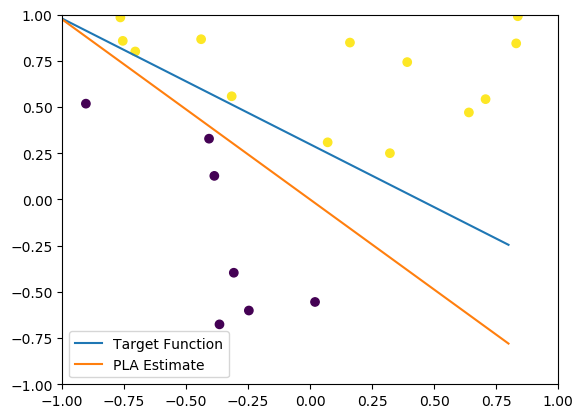

In [90]:
plt.style.use('default')
a = 2 * np.random.random(2) - 1
b = 2 * np.random.random(2) - 1
f = generate_target_function(a, b)
L = generate_line_points(a, b)
X, Y = generate_training_data(f, 20)
w = pla(X, Y)
E = get_estimated_line_points(w)
plt.scatter(X[:,1], X[:,2], c=Y + 1)
plt.plot(L[:,0], L[:,1], label='Target Function')
plt.plot(E[:,0], E[:,1], label='PLA Estimate')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
print((predict(X, w) == Y).all())